In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/KOA-EMG/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
 
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 2]))))

In [10]:
dataset.head()

,Patient ID,WOMAC_total,WOMAC Severity,DataType,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,...,Lyapunov_TIBIALIS ANT,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13308,22,Mild,Training,49.2,92.1,51.8,101.6,91.7,88.8,...,0.20,48.935608,120.815090,86.949185,49.662771,30.602679,101.914340,1.014860,0.253302,1.172114
1,13489,35,Mild,Training,116.0,232.8,104.6,225.5,79.7,120.1,...,0.26,52.187204,244.146045,46.506634,189.255449,211.104414,134.602751,3.626472,0.864664,2.894270
2,13489,35,Mild,Training,101.4,55.7,76.0,63.9,122.8,74.3,...,0.25,70.259125,70.225682,75.729112,141.818740,28.911669,211.453368,2.018510,0.411697,2.792234
3,13532,33,Mild,Training,139.7,46.0,69.5,88.5,169.0,35.8,...,0.30,151.986792,28.925641,219.105386,123.184526,78.659590,70.327124,0.810495,2.719372,0.320974
4,13549,30,Mild,Training,113.5,40.2,112.2,38.5,276.0,107.6,...,0.40,145.992226,53.319007,377.515540,79.111070,20.960417,121.125857,0.541885,0.393113,0.320850


In [11]:
set(list(dataset['WOMAC Severity']))

{'Mild', 'Moderate', 'Severe'}

In [13]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['WOMAC Severity']=encoder.fit_transform(dataset['WOMAC Severity'])

In [14]:
set(list(dataset['WOMAC Severity']))

{0, 1, 2}

In [15]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 2]

#Feature Selection (Model Free)

In [16]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

<font color='blue' size=6><b>Input</b></font>

In [19]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 30


In [20]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                      Specs     Score
69     Stddev_GASTROCNEMIUS  8.248139
79           Swing_CCI_G-MH  5.571048
23        Min_GASTROCNEMIUS  5.233685
83   swing/stance_CCI(TA-G)  4.372019
54            Average_AUC_B  4.010486
80           Swing_CCI_TA-G  3.965959
48       Area_GASTROCNEMIUS  3.958829
39   Integral_GASTROCNEMIUS  3.665234
45       Average_Integral_B  3.516522
10            Stride_Length  3.479640
11              Step_Length  3.323856
32       Min T_TIBIALIS ANT  2.458325
65   Kurtosis_GASTROCNEMIUS  2.388941
78          Swing_CCI_TA-RF  2.126454
4                  CCI_TA-G  2.021017
8                   Cadence  1.944989
7                   CCI_F-B  1.919262
70      Stddev_TIBIALIS ANT  1.904718
49        Area_TIBIALIS ANT  1.786631
59              Skew_RECTUS  1.705994
36   Max-Min T_TIBIALIS ANT  1.686615
47          Area_MEDIAL HAM  1.642164
53            Average_AUC_F  1.603910
66    Kurtosis_TIBIALIS ANT  1.513256
24         Min_TIBIALIS ANT  1.508865
77          

In [21]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [32]:
print(list_of_feat)

[' Stddev_GASTROCNEMIUS', 'Swing_CCI_G-MH', ' Min_GASTROCNEMIUS', 'swing/stance_CCI(TA-G)', 'Average_AUC_B', 'Swing_CCI_TA-G', ' Area_GASTROCNEMIUS', ' Integral_GASTROCNEMIUS', 'Average_Integral_B', 'Stride_Length', 'Step_Length', ' Min T_TIBIALIS ANT', ' Kurtosis_GASTROCNEMIUS', 'Swing_CCI_TA-RF', 'CCI_TA-G', 'Cadence', 'CCI_F-B', ' Stddev_TIBIALIS ANT', ' Area_TIBIALIS ANT', ' Skew_RECTUS', ' Max-Min T_TIBIALIS ANT', ' Area_MEDIAL HAM', 'Average_AUC_F', ' Kurtosis_TIBIALIS ANT', ' Min_TIBIALIS ANT', 'Stance_CCI_TA-G', 'Speed', ' Lin_reg_GASTROCNEMIUS', ' Kurtosis_RECTUS', ' Max T_MEDIAL HAM']


In [33]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 2]

In [34]:
X_new.shape

(150, 30)

In [35]:
y_new.shape

(150,)

In [36]:
'''from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'''

'from sklearn.model_selection import train_test_split\nX_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'

In [37]:
X_train_with_subject=X_new.iloc[:120,:]  
X_test_with_subject=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [38]:
X_train_with_subject

,Stddev_GASTROCNEMIUS,Swing_CCI_G-MH,Min_GASTROCNEMIUS,swing/stance_CCI(TA-G),Average_AUC_B,Swing_CCI_TA-G,Area_GASTROCNEMIUS,Integral_GASTROCNEMIUS,Average_Integral_B,Stride_Length,...,Max-Min T_TIBIALIS ANT,Area_MEDIAL HAM,Average_AUC_F,Kurtosis_TIBIALIS ANT,Min_TIBIALIS ANT,Stance_CCI_TA-G,Speed,Lin_reg_GASTROCNEMIUS,Kurtosis_RECTUS,Max T_MEDIAL HAM
0,25.30,30.602679,6.70,1.172114,3675.30,101.914340,1963.60,3573.20,3943.75,85.1,...,59,5387.00,1792.95,5.90,11.00,86.949185,61.7,-0.10,3.90,100
1,8.23,211.104414,69.33,2.894270,823.53,134.602751,780.13,8076.82,6356.19,97.1,...,-17,866.93,1930.84,3.09,15.52,46.506634,74.1,-0.15,1.71,15
2,20.06,28.911669,17.52,2.792234,1262.92,211.453368,1318.57,3389.08,4852.08,98.9,...,-16,1207.27,1605.08,2.98,17.29,75.729112,76.0,-0.49,3.20,14
3,20.50,78.659590,4.80,0.320974,1734.45,70.327124,1423.60,2194.30,3208.80,87.2,...,87,2045.30,1260.45,3.90,12.60,219.105386,66.5,0.20,12.30,12
4,22.60,20.960417,9.10,0.320850,1597.10,121.125857,1256.40,2335.60,3967.25,96.4,...,81,1937.80,1935.65,2.00,18.10,377.515540,77.3,0.00,2.40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,9.90,138.208711,57.50,3.422930,1530.25,105.127687,1857.00,6498.90,5830.15,78.2,...,-25,1203.50,1820.35,4.40,10.70,30.712774,68.0,-0.20,3.90,59
116,21.90,34.999366,8.40,1.595415,1777.00,407.450855,1447.60,3495.60,4302.10,78.2,...,11,2106.40,1687.55,2.80,60.20,255.388617,69.3,0.00,3.10,46
117,19.44,125.064164,17.30,1.613951,1656.40,265.808789,1894.16,5623.50,4461.54,66.9,...,-34,1418.63,1206.27,2.27,58.02,164.694468,67.1,-0.28,5.55,18
118,19.10,53.348928,16.30,1.958926,2068.14,169.665391,1178.85,3571.60,4510.84,90.2,...,15,2957.44,1531.58,2.32,16.91,86.611455,92.9,-0.26,5.81,16


In [39]:
X_test_with_subject

,Stddev_GASTROCNEMIUS,Swing_CCI_G-MH,Min_GASTROCNEMIUS,swing/stance_CCI(TA-G),Average_AUC_B,Swing_CCI_TA-G,Area_GASTROCNEMIUS,Integral_GASTROCNEMIUS,Average_Integral_B,Stride_Length,...,Max-Min T_TIBIALIS ANT,Area_MEDIAL HAM,Average_AUC_F,Kurtosis_TIBIALIS ANT,Min_TIBIALIS ANT,Stance_CCI_TA-G,Speed,Lin_reg_GASTROCNEMIUS,Kurtosis_RECTUS,Max T_MEDIAL HAM
120,21.80,82.676272,27.90,0.889681,1792.60,83.944362,1922.10,5717.80,5382.85,116.8,...,28,1663.10,1827.95,3.10,13.50,94.353370,108.4,-0.20,8.70,10
121,17.60,64.138358,36.00,1.209696,1936.55,128.642708,1102.20,4814.20,5649.70,119.8,...,85,2770.90,1033.55,3.50,31.80,106.343048,111.6,0.00,7.50,0
122,19.00,65.285482,30.10,3.107311,2415.00,185.501568,1723.10,5405.10,5335.30,98.4,...,-41,3106.90,1759.95,1.80,8.50,59.698432,88.1,-0.40,10.40,4
123,25.00,78.629681,12.90,0.882303,2541.50,178.048664,2082.20,4113.80,5233.20,110.6,...,48,3000.80,1280.05,3.10,34.20,201.799810,106.6,0.40,2.20,2
124,24.90,64.207572,17.60,1.534458,2902.50,216.002206,2320.20,5411.50,4970.90,105.9,...,-24,3484.80,1978.25,1.70,17.80,140.767762,94.9,-0.20,7.30,4
125,21.90,67.644441,9.10,6.989563,2206.10,403.468025,1699.40,3362.20,4764.70,105.6,...,-18,2712.80,2314.05,3.80,13.40,57.724357,95.4,0.00,7.60,2
126,31.70,16.043817,10.90,3.743181,3697.35,407.104307,3142.40,4268.10,4724.50,125.1,...,-26,4252.30,2139.80,2.20,25.60,108.758906,101.3,-0.40,2.90,68
127,24.40,35.934817,16.60,2.052150,1734.70,266.326016,2148.10,3851.20,5494.20,62.6,...,51,1321.30,1780.80,2.60,32.10,129.779021,50.4,-0.50,4.20,94
128,13.60,131.061267,44.50,1.660257,1619.45,145.432434,972.20,6379.50,6823.95,61.9,...,-7,2266.70,1177.10,2.90,27.40,87.596328,47.9,0.00,2.80,78
129,19.10,119.206854,22.00,2.711981,2049.00,144.415087,1654.90,6129.10,5713.05,113.1,...,-25,2443.10,2042.15,2.50,6.40,53.250781,103.6,-0.20,2.70,11


In [40]:
X_train = X_train_with_subject.iloc[:,:]
X_test  = X_test_with_subject.iloc[:,:]

In [41]:
result={}



---





---



#ADABOOST

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[2 5 0]
 [9 8 0]
 [1 5 0]]
              precision    recall  f1-score   support

           0       0.17      0.29      0.21         7
           1       0.44      0.47      0.46        17
           2       0.00      0.00      0.00         6

    accuracy                           0.33        30
   macro avg       0.20      0.25      0.22        30
weighted avg       0.29      0.33      0.31        30

Accurecy:  0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/200 round completed......................... Accurecy: 0.43333333333333335
2/200 round completed......................... Accurecy: 0.5333333333333333
3/200 round completed......................... Accurecy: 0.5333333333333333
4/200 round completed......................... Accurecy: 0.5333333333333333
5/200 round completed......................... Accurecy: 0.5
6/200 round completed......................... Accurecy: 0.5333333333333333
7/200 round completed......................... Accurecy: 0.5333333333333333
8/200 round completed......................... Accurecy: 0.6
9/200 round completed......................... Accurecy: 0.5
10/200 round completed......................... Accurecy: 0.5666666666666667
11/200 round completed......................... Accurecy: 0.5
12/200 round completed......................... Accurecy: 0.5333333333333333
13/200 round completed......................... Accurecy: 0.4666666666666667
14/200 round completed......................... Accurecy: 0.5
15/20

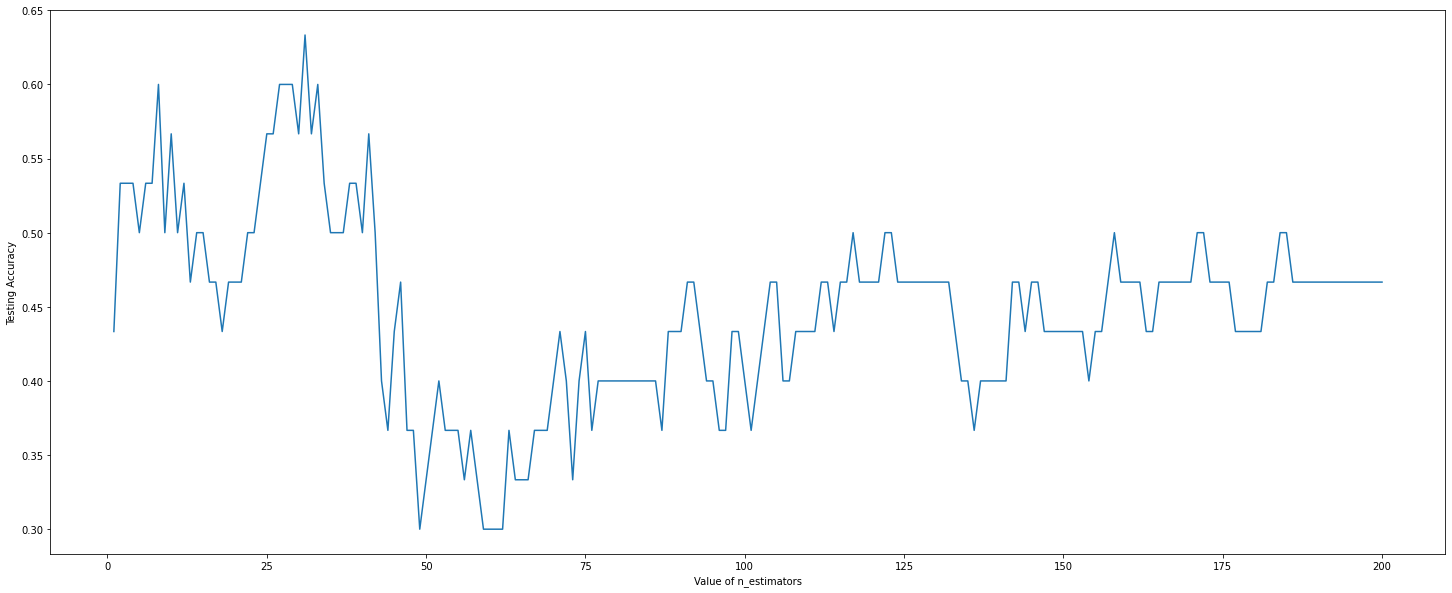

In [43]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 6  1  0]
 [ 4 13  0]
 [ 2  4  0]]
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.72      0.76      0.74        17
           2       0.00      0.00      0.00         6

    accuracy                           0.63        30
   macro avg       0.41      0.54      0.46        30
weighted avg       0.53      0.63      0.57        30

Accurecy:  0.6333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



---



#Graddient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[ 3  4  0]
 [ 5 10  2]
 [ 2  4  0]]
              precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.56      0.59      0.57        17
           2       0.00      0.00      0.00         6

    accuracy                           0.43        30
   macro avg       0.29      0.34      0.31        30
weighted avg       0.38      0.43      0.41        30

Accurecy:  0.43333333333333335


1/150 round completed......................... Accurecy: 0.5666666666666667
2/150 round completed......................... Accurecy: 0.5666666666666667
3/150 round completed......................... Accurecy: 0.5666666666666667
4/150 round completed......................... Accurecy: 0.5666666666666667
5/150 round completed......................... Accurecy: 0.5666666666666667
6/150 round completed......................... Accurecy: 0.5333333333333333
7/150 round completed......................... Accurecy: 0.5
8/150 round completed......................... Accurecy: 0.5333333333333333
9/150 round completed......................... Accurecy: 0.5
10/150 round completed......................... Accurecy: 0.5
11/150 round completed......................... Accurecy: 0.5
12/150 round completed......................... Accurecy: 0.4666666666666667
13/150 round completed......................... Accurecy: 0.5
14/150 round completed......................... Accurecy: 0.5
15/150 round complete

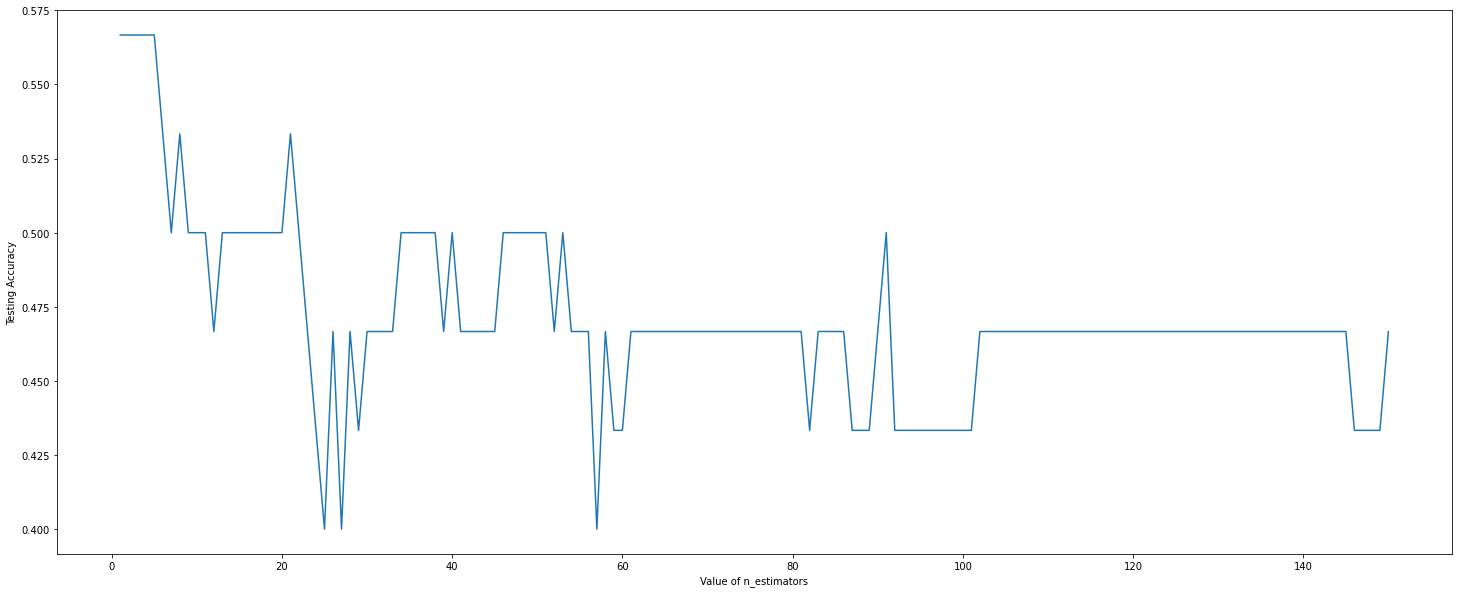

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.43333333333333335
2/30 round completed......................... Accurecy: 0.43333333333333335
3/30 round completed......................... Accurecy: 0.43333333333333335
4/30 round completed......................... Accurecy: 0.5
5/30 round completed......................... Accurecy: 0.43333333333333335
6/30 round completed......................... Accurecy: 0.26666666666666666
7/30 round completed......................... Accurecy: 0.43333333333333335
8/30 round completed......................... Accurecy: 0.4666666666666667
9/30 round completed......................... Accurecy: 0.43333333333333335
10/30 round completed......................... Accurecy: 0.43333333333333335
11/30 round completed......................... Accurecy: 0.43333333333333335
12/30 round completed......................... Accurecy: 0.43333333333333335
13/30 round completed......................... Accurecy: 0.43333333333333335
14/30 round completed....

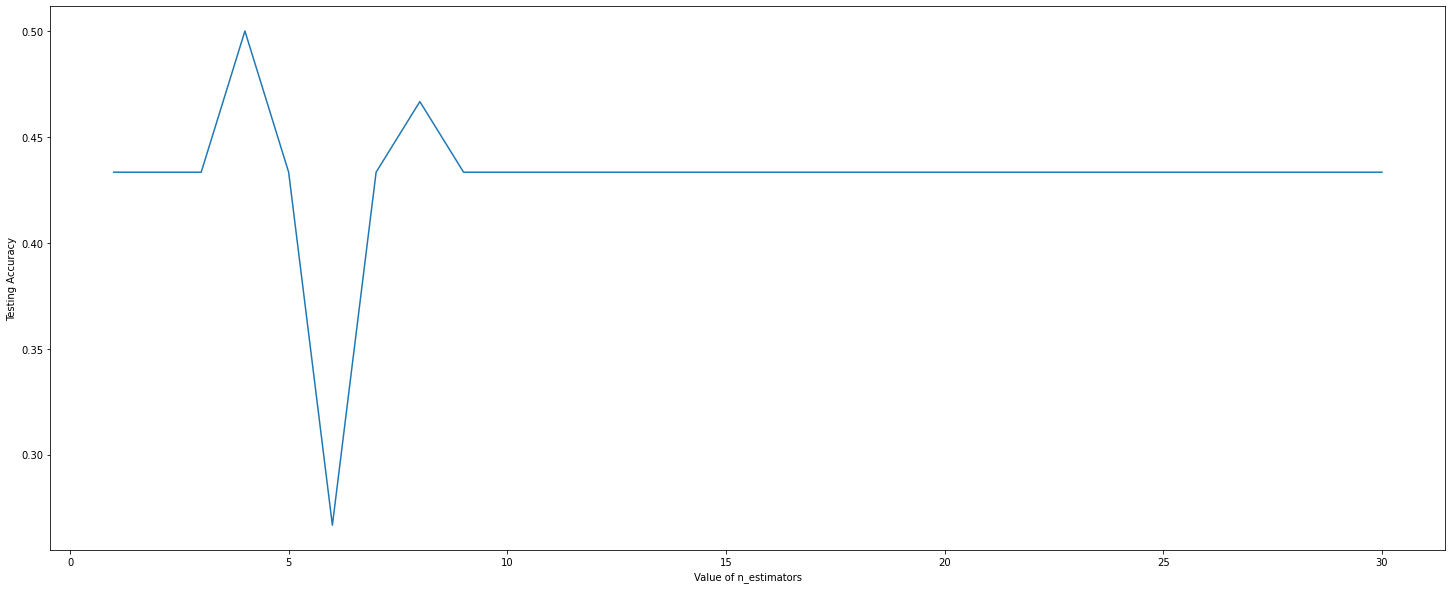

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[ 0  7  0]
 [ 0 17  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      1.00      0.72        17
           2       0.00      0.00      0.00         6

    accuracy                           0.57        30
   macro avg       0.19      0.33      0.24        30
weighted avg       0.32      0.57      0.41        30

Accurecy:  0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[6 1 0]
 [5 9 3]
 [2 4 0]]
              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       0.64      0.53      0.58        17
           2       0.00      0.00      0.00         6

    accuracy                           0.50        30
   macro avg       0.37      0.46      0.39        30
weighted avg       0.47      0.50      0.47        30

Accurecy:  0.5


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[ 0  7  0]
 [ 0 17  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      1.00      0.72        17
           2       0.00      0.00      0.00         6

    accuracy                           0.57        30
   macro avg       0.19      0.33      0.24        30
weighted avg       0.32      0.57      0.41        30

Accurecy:  0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



---



#Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[2 5 0]
 [5 9 3]
 [2 4 0]]
              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.50      0.53      0.51        17
           2       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.24      0.27      0.25        30
weighted avg       0.34      0.37      0.35        30

Accurecy:  0.36666666666666664


1/150 round completed......................... Accurecy: 0.3333333333333333
2/150 round completed......................... Accurecy: 0.5
3/150 round completed......................... Accurecy: 0.36666666666666664
4/150 round completed......................... Accurecy: 0.4
5/150 round completed......................... Accurecy: 0.3
6/150 round completed......................... Accurecy: 0.3333333333333333
7/150 round completed......................... Accurecy: 0.36666666666666664
8/150 round completed......................... Accurecy: 0.43333333333333335
9/150 round completed......................... Accurecy: 0.4
10/150 round completed......................... Accurecy: 0.4666666666666667
11/150 round completed......................... Accurecy: 0.5333333333333333
12/150 round completed......................... Accurecy: 0.5
13/150 round completed......................... Accurecy: 0.5666666666666667
14/150 round completed......................... Accurecy: 0.5333333333333333
15/

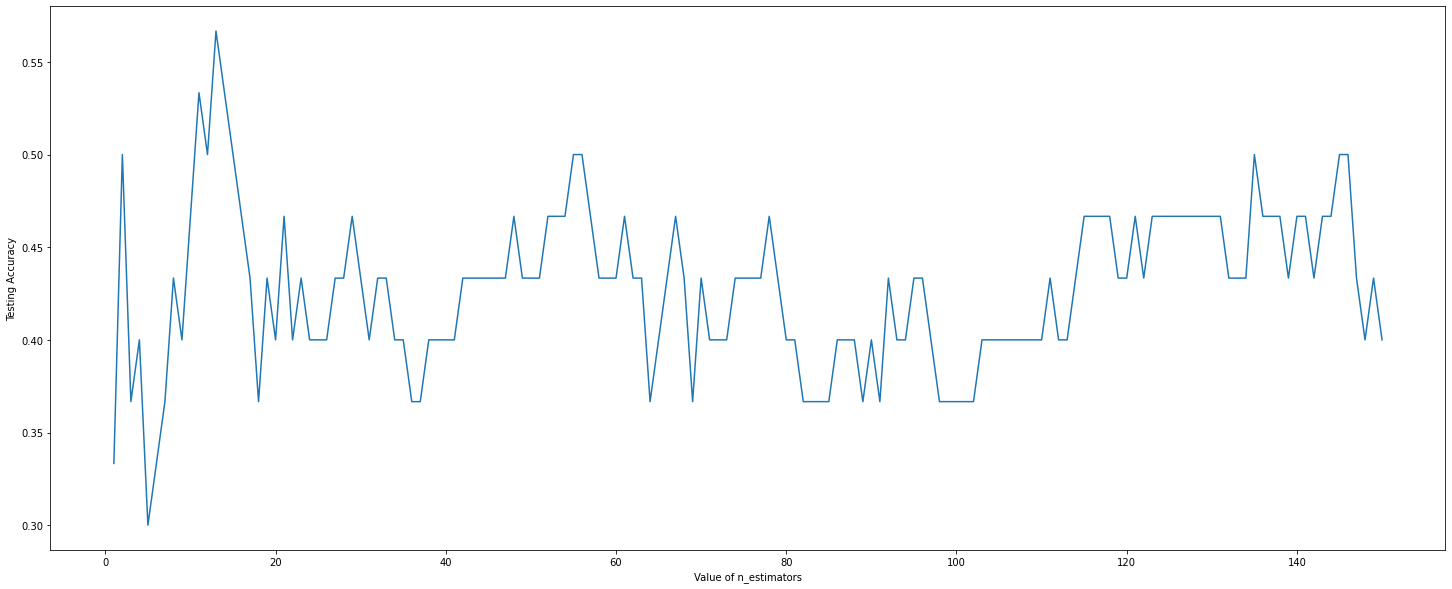

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.5666666666666667
2/150 round completed......................... Accurecy: 0.5333333333333333
3/150 round completed......................... Accurecy: 0.5666666666666667
4/150 round completed......................... Accurecy: 0.5
5/150 round completed......................... Accurecy: 0.4666666666666667
6/150 round completed......................... Accurecy: 0.5
7/150 round completed......................... Accurecy: 0.43333333333333335
8/150 round completed......................... Accurecy: 0.43333333333333335
9/150 round completed......................... Accurecy: 0.36666666666666664
10/150 round completed......................... Accurecy: 0.4
11/150 round completed......................... Accurecy: 0.36666666666666664
12/150 round completed......................... Accurecy: 0.4
13/150 round completed......................... Accurecy: 0.36666666666666664
14/150 round completed......................... Accurecy: 0.366

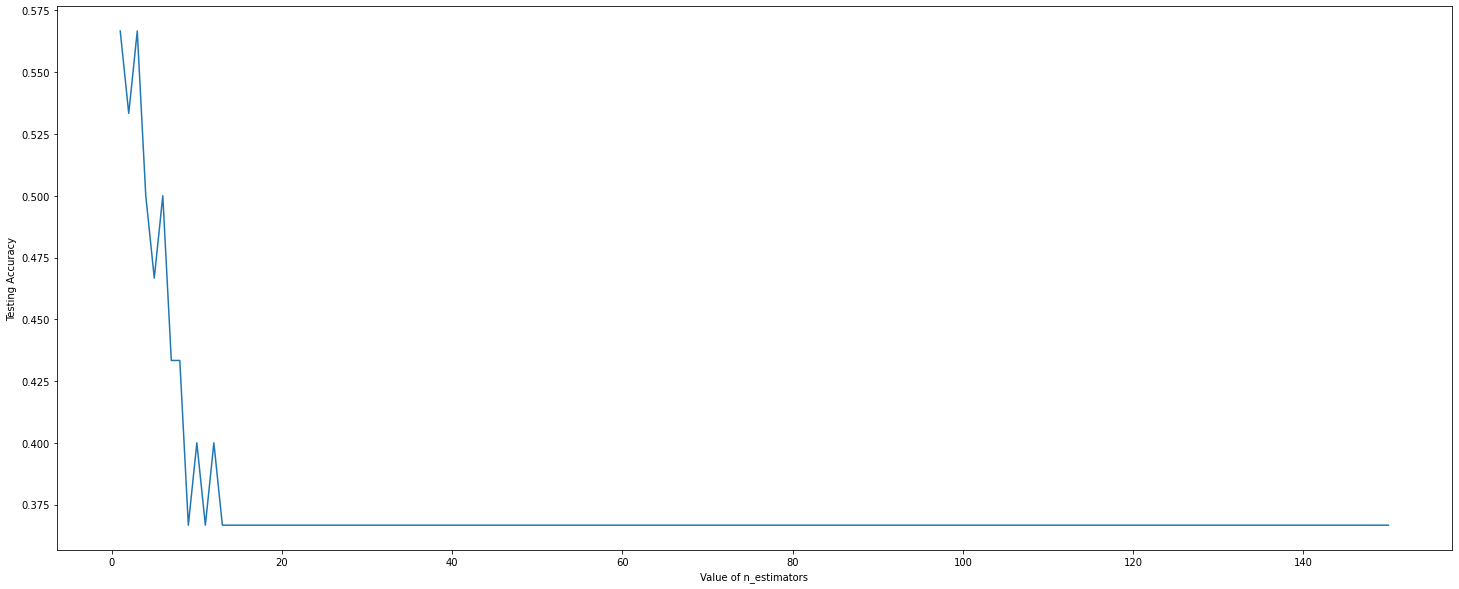

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[ 3  3  1]
 [ 2 13  2]
 [ 2  3  1]]
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.68      0.76      0.72        17
           2       0.25      0.17      0.20         6

    accuracy                           0.57        30
   macro avg       0.45      0.45      0.45        30
weighted avg       0.54      0.57      0.55        30

Accurecy:  0.5666666666666667


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[ 0  7  0]
 [ 0 17  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      1.00      0.72        17
           2       0.00      0.00      0.00         6

    accuracy                           0.57        30
   macro avg       0.19      0.33      0.24        30
weighted avg       0.32      0.57      0.41        30

Accurecy:  0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[ 0  7  0]
 [ 0 17  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      1.00      0.72        17
           2       0.00      0.00      0.00         6

    accuracy                           0.57        30
   macro avg       0.19      0.33      0.24        30
weighted avg       0.32      0.57      0.41        30

Accurecy:  0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



---



#XGB

In [57]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[ 2  4  1]
 [ 3 12  2]
 [ 2  4  0]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.60      0.71      0.65        17
           2       0.00      0.00      0.00         6

    accuracy                           0.47        30
   macro avg       0.30      0.33      0.31        30
weighted avg       0.41      0.47      0.43        30

Accurecy:  0.4666666666666667


1/250 round completed......................... Accurecy: 0.43333333333333335
2/250 round completed......................... Accurecy: 0.5333333333333333
3/250 round completed......................... Accurecy: 0.5333333333333333
4/250 round completed......................... Accurecy: 0.5333333333333333
5/250 round completed......................... Accurecy: 0.5333333333333333
6/250 round completed......................... Accurecy: 0.5
7/250 round completed......................... Accurecy: 0.4666666666666667
8/250 round completed......................... Accurecy: 0.43333333333333335
9/250 round completed......................... Accurecy: 0.43333333333333335
10/250 round completed......................... Accurecy: 0.4666666666666667
11/250 round completed......................... Accurecy: 0.4666666666666667
12/250 round completed......................... Accurecy: 0.5
13/250 round completed......................... Accurecy: 0.43333333333333335
14/250 round completed............

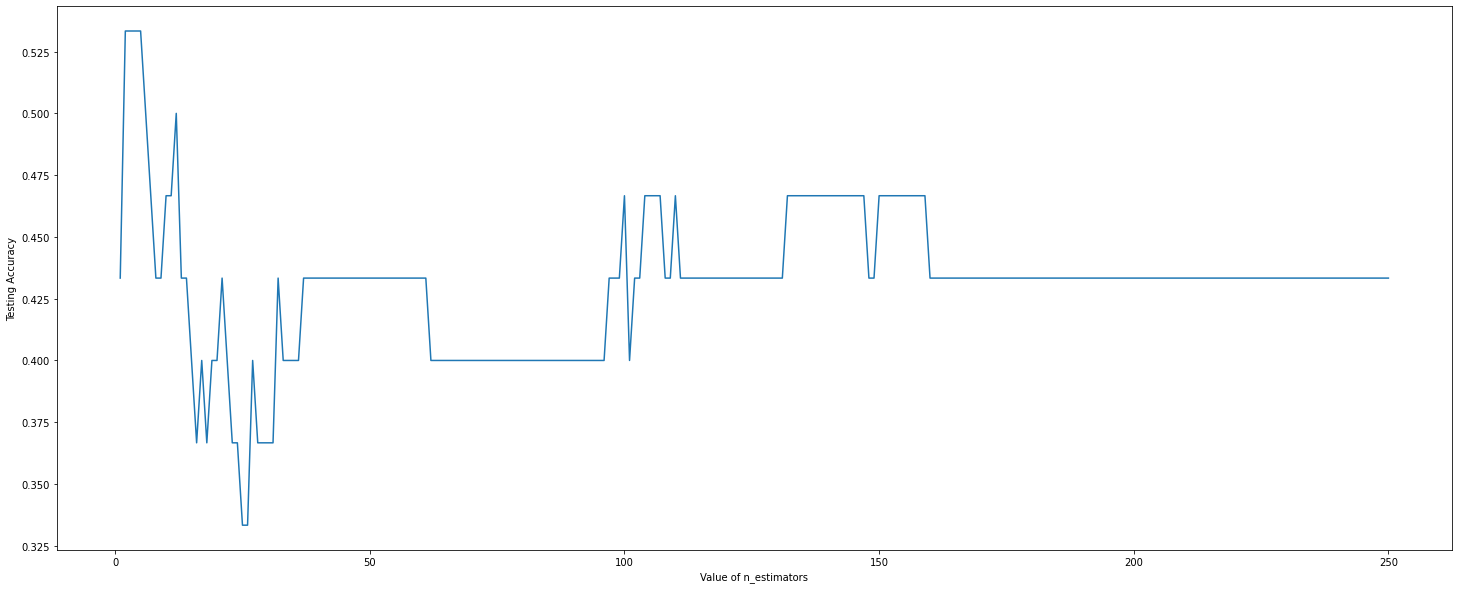

In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.5
2/250 round completed......................... Accurecy: 0.5
3/250 round completed......................... Accurecy: 0.4666666666666667
4/250 round completed......................... Accurecy: 0.5
5/250 round completed......................... Accurecy: 0.5
6/250 round completed......................... Accurecy: 0.36666666666666664
7/250 round completed......................... Accurecy: 0.4
8/250 round completed......................... Accurecy: 0.5333333333333333
9/250 round completed......................... Accurecy: 0.5333333333333333
10/250 round completed......................... Accurecy: 0.5333333333333333
11/250 round completed......................... Accurecy: 0.5333333333333333
12/250 round completed......................... Accurecy: 0.5333333333333333
13/250 round completed......................... Accurecy: 0.5333333333333333
14/250 round completed......................... Accurecy: 0.5333333333333333
15/25

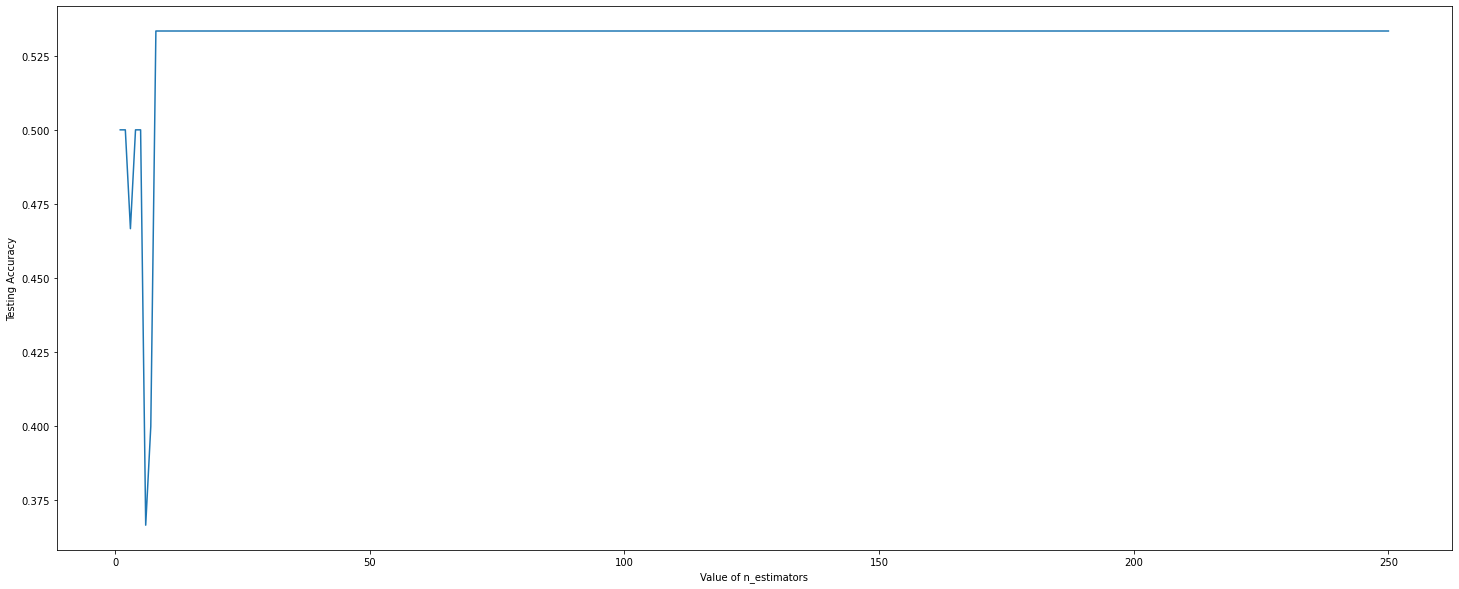

In [59]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [60]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[ 3  3  1]
 [ 3 13  1]
 [ 1  5  0]]
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.62      0.76      0.68        17
           2       0.00      0.00      0.00         6

    accuracy                           0.53        30
   macro avg       0.35      0.40      0.37        30
weighted avg       0.45      0.53      0.49        30

Accurecy:  0.5333333333333333
XGBClassifier(max_depth=8, objective='multi:softprob')


In [61]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[4 3 0]
 [4 8 5]
 [1 1 4]]
              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.67      0.47      0.55        17
           2       0.44      0.67      0.53         6

    accuracy                           0.53        30
   macro avg       0.52      0.57      0.53        30
weighted avg       0.57      0.53      0.54        30

Accurecy:  0.5333333333333333
XGBClassifier(n_estimators=2, objective='multi:softprob')


In [62]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[ 4  3  0]
 [ 5 10  2]
 [ 0  3  3]]
              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.62      0.59      0.61        17
           2       0.60      0.50      0.55         6

    accuracy                           0.57        30
   macro avg       0.56      0.55      0.55        30
weighted avg       0.58      0.57      0.57        30

Accurecy:  0.5666666666666667


#KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[1 5 1]
 [5 9 3]
 [2 4 0]]
              precision    recall  f1-score   support

           0       0.12      0.14      0.13         7
           1       0.50      0.53      0.51        17
           2       0.00      0.00      0.00         6

    accuracy                           0.33        30
   macro avg       0.21      0.22      0.22        30
weighted avg       0.31      0.33      0.32        30

Accurecy:  0.3333333333333333


1/105 round completed......................... Accurecy: 0.3
2/105 round completed......................... Accurecy: 0.3333333333333333
3/105 round completed......................... Accurecy: 0.23333333333333334
4/105 round completed......................... Accurecy: 0.3333333333333333
5/105 round completed......................... Accurecy: 0.3333333333333333
6/105 round completed......................... Accurecy: 0.43333333333333335
7/105 round completed......................... Accurecy: 0.43333333333333335
8/105 round completed......................... Accurecy: 0.5333333333333333
9/105 round completed......................... Accurecy: 0.5
10/105 round completed......................... Accurecy: 0.5333333333333333
11/105 round completed......................... Accurecy: 0.5
12/105 round completed......................... Accurecy: 0.43333333333333335
13/105 round completed......................... Accurecy: 0.43333333333333335
14/105 round completed......................... 

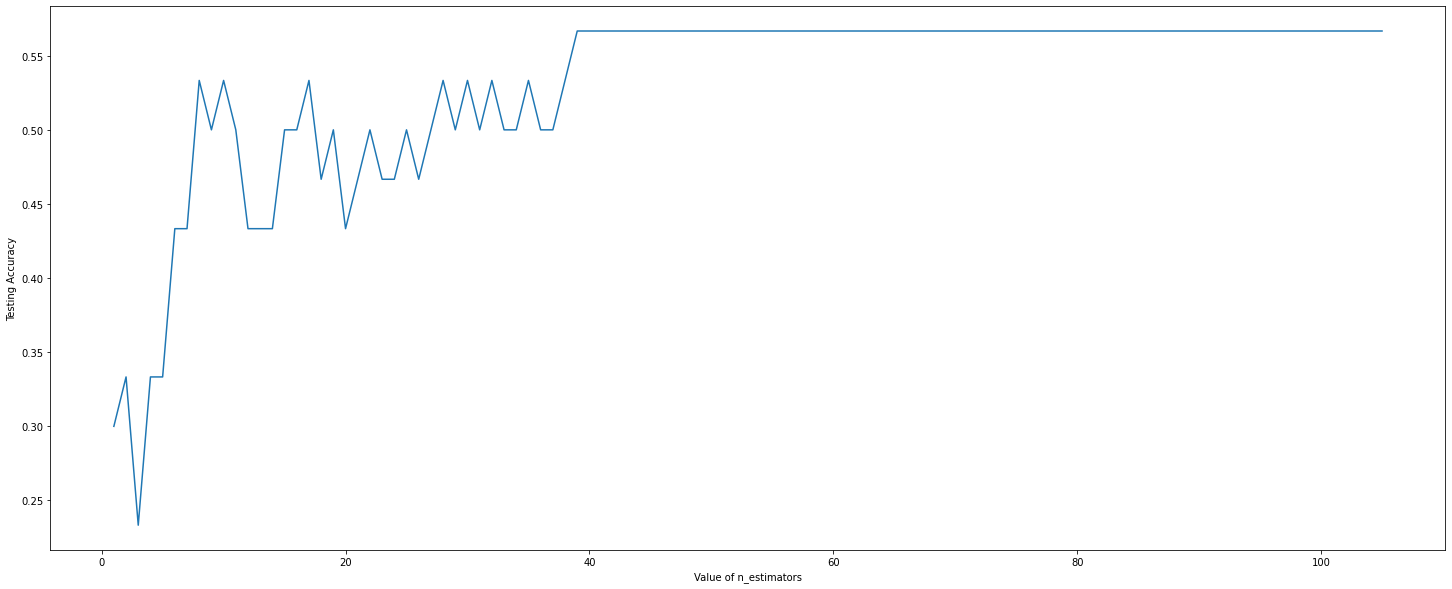

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 0  7  0]
 [ 0 17  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      1.00      0.72        17
           2       0.00      0.00      0.00         6

    accuracy                           0.57        30
   macro avg       0.19      0.33      0.24        30
weighted avg       0.32      0.57      0.41        30

Accurecy:  0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#NB

In [66]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[5 2 0]
 [5 3 9]
 [0 1 5]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.50      0.18      0.26        17
           2       0.36      0.83      0.50         6

    accuracy                           0.43        30
   macro avg       0.45      0.57      0.45        30
weighted avg       0.47      0.43      0.39        30

Accurecy:  0.43333333333333335




---



---



#Result

In [67]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.3333333333333333
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=31, random_state=0) 1  :  0.6333333333333333
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.43333333333333335
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=1, random_state=0) 2  :  0.5666666666666667
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=4, random_state=0) 2  :  0.5
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=4, n_estimators=1, random_state=0) 2  :  0.5666666666666667
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.36666666666666664
---------------------------------------------------------------

RandomForestClassifier(n_es

In [68]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(AdaBoostClassifier(n_estimators=31, random_state=0), 1, 'AdaBoostClassifier')   :  0.6333333333333333
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(n_estimators=1, random_state=0), 2, 'GradientBoostingClassifier')   :  0.5666666666666667
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=4, n_estimators=1, random_state=0), 2, 'GradientBoostingClassifier')   :  0.5666666666666667
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=13, random_state=0), 3, 'RandomForestClassifier')   :  0.5666666666666667
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=1, random_state=0), 3, 'RandomForestClassifier')   :  0.5666666666666667
--------------------------------------

In [69]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(AdaBoostClassifier(n_estimators=31, random_state=0), 'AdaBoostClassifier')
(GradientBoostingClassifier(n_estimators=1, random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(n_estimators=13, random_state=0), 'RandomForestClassifier')
(XGBClassifier(max_depth=8, n_estimators=2, objective='multi:softprob'), 'xgboost')


In [70]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [71]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
AdaBoostClassifier(n_estimators=31, random_state=0)
[[ 6  1  0]
 [ 4 13  0]
 [ 2  4  0]]
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.72      0.76      0.74        17
           2       0.00      0.00      0.00         6

    accuracy                           0.63        30
   macro avg       0.41      0.54      0.46        30
weighted avg       0.53      0.63      0.57        30

Accurecy:  0.6333333333333333
--------------------------------------------------
GradientBoostingClassifier(n_estimators=1, random_state=0)
[[ 0  7  0]
 [ 0 17  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      1.00      0.72        17
           2       0.00      0.00      0.00         6

    accuracy                           0.57        30
   macro avg       0.19      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

#Model Check Box

In [76]:
def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

#SHAP

In [72]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.0 MB/s 


In [73]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [77]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=31, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=1, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=13, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=13, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=2, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=2, objective='multi:softprob')", in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=39)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Models:  GradientBoostingClassifier(max_depth=4, n_estimators=1, random_state=0)


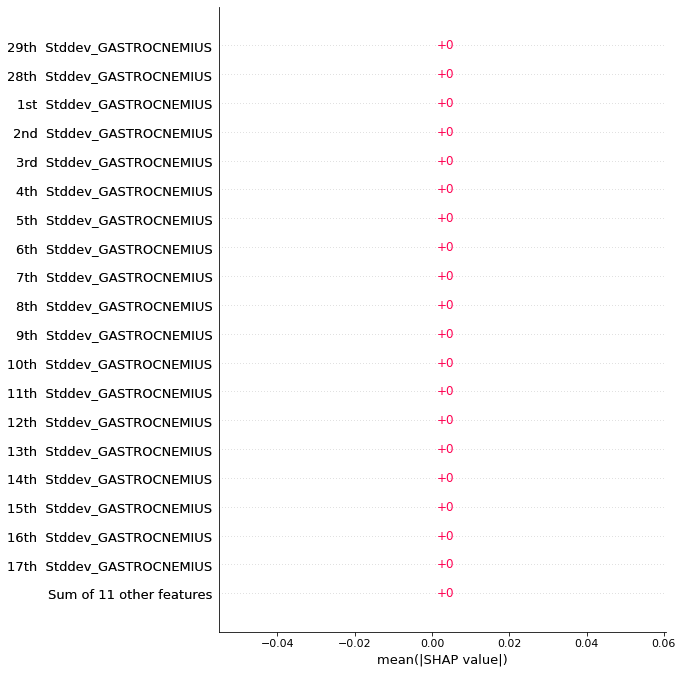

---------------------


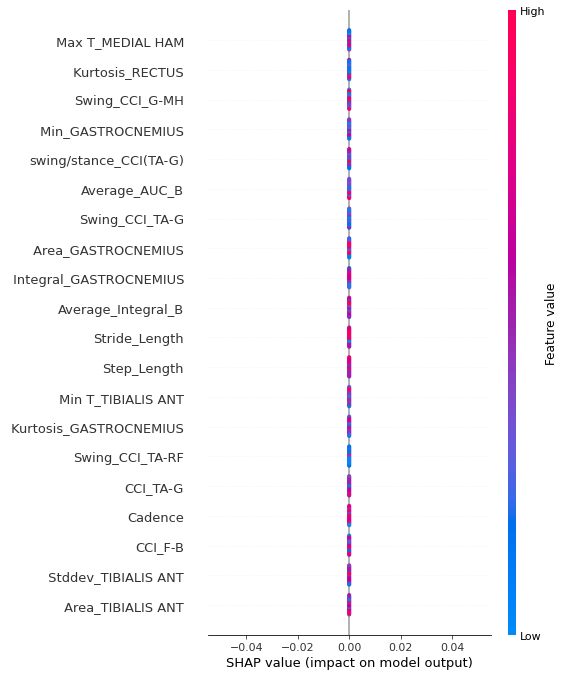

---------------------
Local Explaination


IndexError: ignored

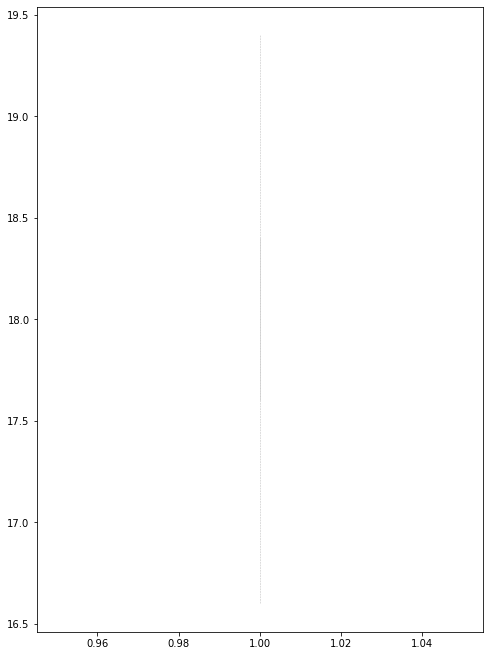

In [78]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}



for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test_with_subject

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

# Model Check Box Function

In [ ]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

#ROC Comparaing Machine Learning Models

In [79]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [80]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=31, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=1, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=13, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=13, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=2, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=2, objective='multi:softprob')", in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=39)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)


Change  the given dictionary of graph feature for desire graph.

In [81]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)

ValueError: ignored



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(X_test.shape[0],), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))